In [1]:
var openDigger = require('../src/open_digger');
var repo_id = 3122202
var database = 'github_log';
var year = 2022, startYear = 2015;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); 
const query = openDigger.driver.clickhouse.query

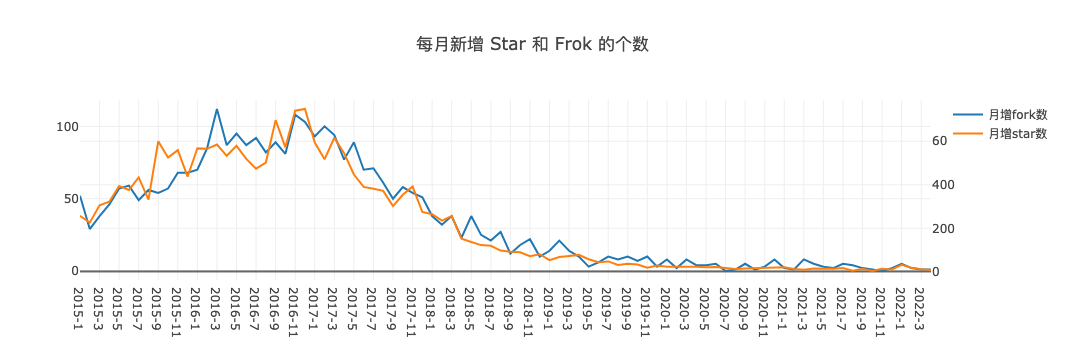

┌─────────┬───────────┬────────────┬────────────┐
│ (index) │   时间    │ 月增fork数 │ 月增star数 │
├─────────┼───────────┼────────────┼────────────┤
│    0    │ '2015-1'  │    '52'    │   '258'    │
│    1    │ '2015-2'  │    '29'    │   '226'    │
│    2    │ '2015-3'  │    '38'    │   '306'    │
│    3    │ '2015-4'  │    '46'    │   '322'    │
│    4    │ '2015-5'  │    '57'    │   '394'    │
│    5    │ '2015-6'  │    '59'    │   '376'    │
│    6    │ '2015-7'  │    '49'    │   '434'    │
│    7    │ '2015-8'  │    '56'    │   '332'    │
│    8    │ '2015-9'  │    '54'    │   '600'    │
│    9    │ '2015-10' │    '57'    │   '525'    │
│   10    │ '2015-11' │    '68'    │   '559'    │
│   11    │ '2015-12' │    '68'    │   '437'    │
│   12    │ '2016-1'  │    '70'    │   '568'    │
│   13    │ '2016-2'  │    '85'    │   '565'    │
│   14    │ '2016-3'  │   '112'    │   '585'    │
│   15    │ '2016-4'  │    '87'    │   '533'    │
│   16    │ '2016-5'  │    '95'    │   '579'    │
│   17  

In [4]:
//任务一：每⽉新增 Star 和 Frok 的个数
Promise.all(years.map(y => {
    var q = `
    SELECT toYear(created_at) year,toMonth(created_at) month,
    count(type = 'ForkEvent' OR NULL) as forks,
    count(type = 'WatchEvent' OR NULL) as stars
    from ${database}.year${y}
    where repo_id = ${repo_id}
    group by 
    year,month
    order by
    year,month`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    
    var time=[],forksCount=[],starsCount=[],table=[];
    data.forEach(d => {
        d.forEach(
            k =>{
                time.push(k.year + '-'+  k.month);
                forksCount.push(k.forks);
                starsCount.push(k.stars);
                table.push({'时间':k.year+'-'+k.month,'月增fork数':k.forks,'月增star数':k.stars});
            }
        )});
    openDigger.render.plotly([
        {x: time, y: forksCount, mode: 'scatter', name: '月增fork数'},
        {x: time, y: starsCount, mode: 'scatter', name: '月增star数', yaxis: 'y2'}
    ], {
        title: '每⽉新增 Star 和 Frok 的个数',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
    console.table(table);
});

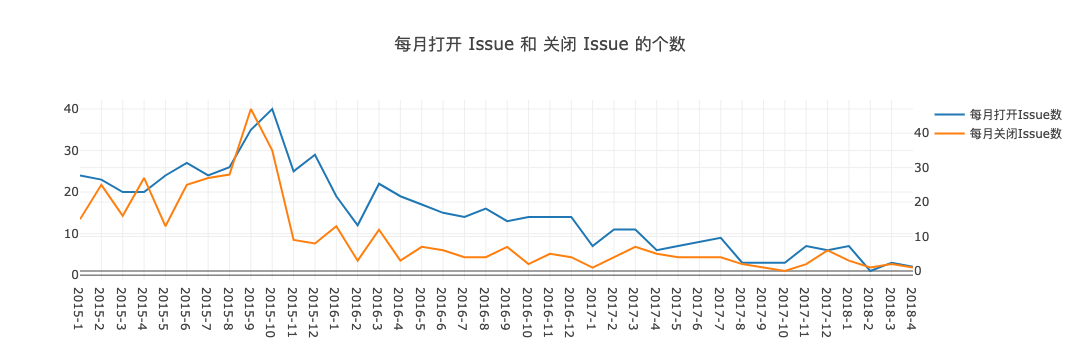

┌─────────┬───────────┬─────────────────┬─────────────────┐
│ (index) │   时间    │ 每月打开Issue数 │ 每月关闭Issue数 │
├─────────┼───────────┼─────────────────┼─────────────────┤
│    0    │ '2015-1'  │      '24'       │      '15'       │
│    1    │ '2015-2'  │      '23'       │      '25'       │
│    2    │ '2015-3'  │      '20'       │      '16'       │
│    3    │ '2015-4'  │      '20'       │      '27'       │
│    4    │ '2015-5'  │      '24'       │      '13'       │
│    5    │ '2015-6'  │      '27'       │      '25'       │
│    6    │ '2015-7'  │      '24'       │      '27'       │
│    7    │ '2015-8'  │      '26'       │      '28'       │
│    8    │ '2015-9'  │      '35'       │      '47'       │
│    9    │ '2015-10' │      '40'       │      '35'       │
│   10    │ '2015-11' │      '25'       │       '9'       │
│   11    │ '2015-12' │      '29'       │       '8'       │
│   12    │ '2016-1'  │      '19'       │      '13'       │
│   13    │ '2016-2'  │      '12'       │       '3' 

In [9]:
//任务二：每⽉打开 Issue 和 关闭 Issue 的个数
Promise.all(years.map(y => {
    var q = `
    SELECT toYear(created_at) year,toMonth(created_at) month,
    count(action = 'opened' OR NULL) as opens,
    count(action = 'closed' OR NULL) as closes
    from ${database}.year${y}
    where repo_id = ${repo_id} and type = 'IssuesEvent'
    group by 
    year,month
    order by
    year,month`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var time=[],opensCount=[],closeCount=[],table=[];
    data.forEach(d => {
        d.forEach(
            k =>{
                time.push(k.year + '-'+  k.month);
                opensCount.push(k.opens);
                closeCount.push(k.closes);
                table.push({'时间':k.year+'-'+k.month,'每月打开Issue数':k.opens,'每月关闭Issue数':k.closes});
            }
        )});
    openDigger.render.plotly([
        {x: time, y:opensCount , mode: 'scatter', name: '每月打开Issue数'},
        {x: time, y: closeCount, mode: 'scatter', name: '每月关闭Issue数', yaxis: 'y2'}
    ], {
        title: '每⽉打开 Issue 和 关闭 Issue 的个数',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
    console.table(table);
});


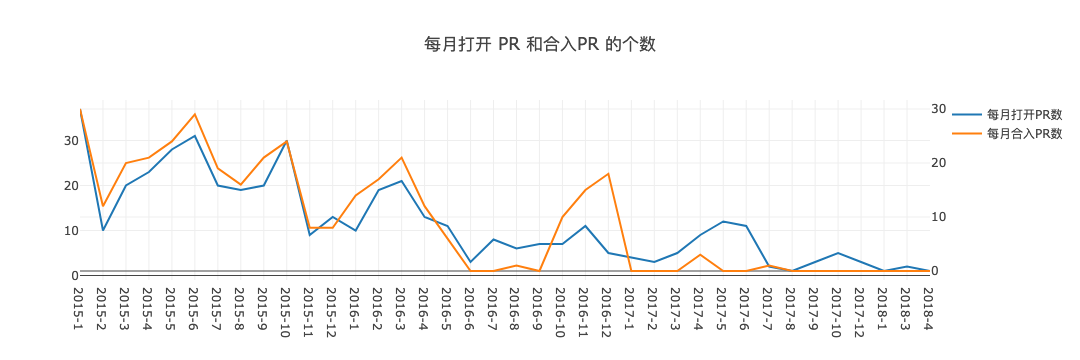

In [13]:
//任务三：每月打开 PR 和合入PR 的个数（注意，关闭 PR 不等于合入）
Promise.all(years.map(y => {
    var q = `
    SELECT toYear(created_at) year,toMonth(created_at) month,
    count(action = 'opened' OR NULL) as opens,
    count((action = 'closed' and pull_merged = 1) OR NULL) as closes
    from ${database}.year${y}
    where repo_id = ${repo_id} and type = 'PullRequestEvent'
    group by 
    year,month
    order by
    year,month`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var time=[],opensCount=[],closeCount=[],table=[];
    data.forEach(d => {
        d.forEach(
            k =>{
                time.push(k.year + '-'+  k.month);
                opensCount.push(k.opens);
                closeCount.push(k.closes);  
                table.push({'时间':k.year+'-'+k.month,'每月打开PR数':k.opens,'每月合入PR数':k.closes});
            }
        )});
    openDigger.render.plotly([
        {x: time, y:opensCount , mode: 'scatter', name: '每月打开PR数'},
        {x: time, y: closeCount, mode: 'scatter', name: '每月合入PR数', yaxis: 'y2'}
    ], {
        title: '每月打开 PR 和合入PR 的个数',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        yaxis3: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

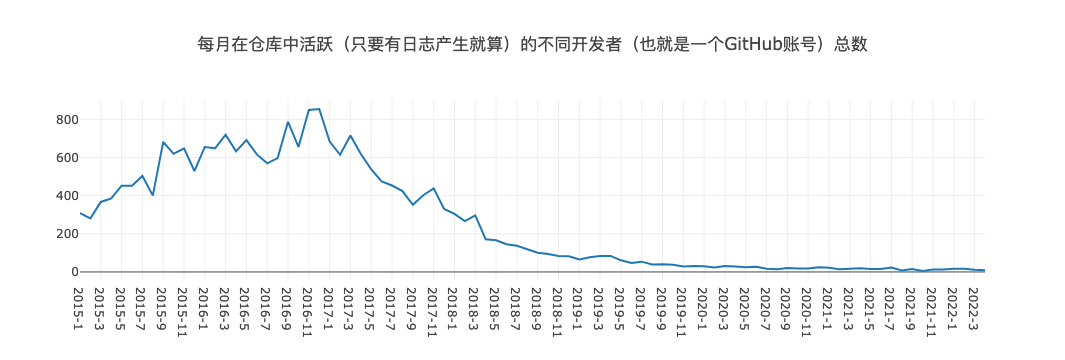

In [18]:
//任务四：每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数
Promise.all(years.map(y => {
    var q = `
    SELECT toYear(created_at) year,toMonth(created_at) month,
    count(distinct actor_id) count
    from ${database}.year${y}
    where repo_id = ${repo_id}
    group by 
    year,month
    order by
    year,month`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var time=[],actorCount=[];
    data.forEach(d =>{
        d.forEach(
            k =>{
                time.push(k.year + '-'+  k.month);
                actorCount.push(k.count);
            }
        )});
    openDigger.render.plotly([
        {x: time, y: actorCount, mode: 'scatter', name: '该月活跃开发者总数', yaxis: 'y'}
    ], {
        title: '每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

In [2]:
var get_logs_query = async () => {
    let tbls = (await query(`show tables from github_log`)).map(tbl => 'github_log.' + tbl.name)
    return tbls.map(tbl => `select * from ${tbl}`).join(' union all ')
}
get_logs_query()

'select * from github_log.year2015 union all select * from github_log.year2016'

In [4]:
//任务五： Issue 从打开到关闭的平均时长和中位数（单位：天）
(async () => {
    return query(`
        select
            avg(dateDiff('day', issue_created_at, issue_closed_at)) as avg,
            quantile(0.5)(dateDiff('day', issue_created_at, issue_closed_at)) as median
        from (${await get_logs_query()})
        where repo_id = '${repo_id}' and type = 'IssuesEvent' and action = 'closed'
    `)
})()

[ { avg: 23.022959183673468, median: 3 } ]

In [11]:
//任务六： PR 从打开到合入的平均时长和中位数（单位：天）
(async () => {
    return query(`
        select
            avg(dateDiff('day', issue_created_at, pull_merged_at)) as avg,
            quantile(0.5)(dateDiff('day', issue_created_at, pull_merged_at)) as median
        from (${await get_logs_query()})
        where repo_id = '${repo_id}' and type = 'PullRequestEvent' and action = 'closed' and pull_merged
    `)
})()

[ { avg: 11.608571428571429, median: 0 } ]

In [3]:
//任务七： Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
(async () => {
    return query(`
        select
            avg(first_comment) as avg,
            quantile(0.5)(first_comment) as median
        from (
            select issue_number, min(dateDiff('day', issue_created_at, issue_comment_created_at)) as first_comment
            from (${await get_logs_query()})
            where repo_id = '${repo_id}' and type = 'IssueCommentEvent' and issue_author_id != issue_comment_author_id
            group by issue_number
        )
    `)
})()

[ { avg: 20.8675799086758, median: 0 } ]